In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import numpy as np
windows_path = "C:\\Users\\Aaron\\Dropbox\\CSC767\\HW2\\BitcoinHeistData.csv"
mac_path = '/Users/Aaron/Dropbox/CSC767/HW2/BitcoinHeistData.csv'
bitcoin_data = pd.read_csv(windows_path)

### Attribute Information:

Features

address: String. Bitcoin address.

year: Integer. Year.

day: Integer. Day of the year. 1 is the first day, 365 is the last day.

length: Integer.

weight: Float.

count: Integer.

looped: Integer.

neighbors: Integer.

income: Integer. Satoshi amount (1 bitcoin = 100 million satoshis).

label: Category String. Name of the ransomware family (e.g., Cryptxxx, cryptolocker etc) or white (i.e., not known to be ransomware).

Our graph features are designed to quantify specific transaction patterns. 
1. Loop is intended to count how many transaction i) split their coins; ii) move these coins in the network by using different paths and finally, and iii) merge them in a single address. Coins at this final address can then be sold and converted to fiat currency. 
2. Weight quantifies the merge behavior (i.e., the transaction has more input addresses than output addresses), where coins in multiple addresses are each passed through a succession of merging transactions and accumulated in a final address. 
3. Similar to weight, the count feature is designed to quantify the merging pattern. However, the count feature represents information on the number of transactions, whereas the weight feature represents information on the amount (what percent of these transactionsâ€™ output?) of transactions. 
4. Length is designed to quantify mixing rounds on Bitcoin, where transactions receive and distribute similar amounts of coins in multiple rounds with newly created addresses to hide the coin origin.

White Bitcoin addresses are capped at 1K per day (Bitcoin has 800K addresses daily). 

In [2]:
bitcoin_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2916697 entries, 0 to 2916696
Data columns (total 10 columns):
 #   Column     Dtype  
---  ------     -----  
 0   address    object 
 1   year       int64  
 2   day        int64  
 3   length     int64  
 4   weight     float64
 5   count      int64  
 6   looped     int64  
 7   neighbors  int64  
 8   income     float64
 9   label      object 
dtypes: float64(2), int64(6), object(2)
memory usage: 222.5+ MB


In [3]:
bitcoin_data.label.value_counts()

white                          2875284
paduaCryptoWall                  12390
montrealCryptoLocker              9315
princetonCerber                   9223
princetonLocky                    6625
montrealCryptXXX                  2419
montrealNoobCrypt                  483
montrealDMALockerv3                354
montrealDMALocker                  251
montrealSamSam                      62
montrealGlobeImposter               55
montrealCryptoTorLocker2015         55
montrealGlobev3                     34
montrealGlobe                       32
montrealWannaCry                    28
montrealRazy                        13
montrealAPT                         11
paduaKeRanger                       10
montrealFlyper                       9
montrealXTPLocker                    8
montrealVenusLocker                  7
montrealXLockerv5.0                  7
montrealCryptConsole                 7
montrealEDA2                         6
montrealJigSaw                       4
paduaJigsaw              

In [4]:
bitcoin_data.head()

,address,year,day,length,weight,count,looped,neighbors,income,label
0,111K8kZAEnJg245r2cM6y9zgJGHZtJPy6,2017,11,18,0.008333,1,0,2,100050000.0,princetonCerber
1,1123pJv8jzeFQaCV4w644pzQJzVWay2zcA,2016,132,44,0.000244,1,0,1,100000000.0,princetonLocky
2,112536im7hy6wtKbpH1qYDWtTyMRAcA2p7,2016,246,0,1.000000,1,0,2,200000000.0,princetonCerber
3,1126eDRw2wqSkWosjTCre8cjjQW8sSeWH7,2016,322,72,0.003906,1,0,2,71200000.0,princetonCerber
4,1129TSjKtx65E35GiUo4AYVeyo48twbrGX,2016,238,144,0.072848,456,0,1,200000000.0,princetonLocky


In [5]:
bitcoin_data

,address,year,day,length,weight,count,looped,neighbors,income,label
0,111K8kZAEnJg245r2cM6y9zgJGHZtJPy6,2017,11,18,0.008333,1,0,2,1.000500e+08,princetonCerber
1,1123pJv8jzeFQaCV4w644pzQJzVWay2zcA,2016,132,44,0.000244,1,0,1,1.000000e+08,princetonLocky
2,112536im7hy6wtKbpH1qYDWtTyMRAcA2p7,2016,246,0,1.000000,1,0,2,2.000000e+08,princetonCerber
3,1126eDRw2wqSkWosjTCre8cjjQW8sSeWH7,2016,322,72,0.003906,1,0,2,7.120000e+07,princetonCerber
4,1129TSjKtx65E35GiUo4AYVeyo48twbrGX,2016,238,144,0.072848,456,0,1,2.000000e+08,princetonLocky
...,...,...,...,...,...,...,...,...,...,...
2916692,12D3trgho1vJ4mGtWBRPyHdMJK96TRYSry,2018,330,0,0.111111,1,0,1,1.255809e+09,white
2916693,1P7PputTcVkhXBmXBvSD9MJ3UYPsiou1u2,2018,330,0,1.000000,1,0,1,4.409699e+07,white
2916694,1KYiKJEfdJtap9QX2v9BXJMpz2SfU4pgZw,2018,330,2,12.000000,6,6,35,2.398267e+09,white
2916695,15iPUJsRNZQZHmZZVwmQ63srsmughCXV4a,2018,330,0,0.500000,1,0,1,1.780427e+08,white


In [124]:
#create labels for address and we'll do a one hot encoding for label
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
#label_encoder.fit(bitcoin_data.label)
#label_encoder_name_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
bitcoin_data.label = label_encoder.fit_transform(bitcoin_data.label)
bitcoin_data.address = label_encoder.fit_transform(bitcoin_data.address)

In [67]:
# One Hot encode the label data in order for us to have 29 columns for our MLP
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
enc_df = pd.DataFrame(enc.fit_transform(bitcoin_data[['label']]).toarray())
enc_df
#enc_df is now a 29 column df

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2916692,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2916693,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2916694,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2916695,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [125]:
bitcoin_data
# note here how label stayed the same but address changed. 
# We've done this on purpose to keep the label column in tact and use a modified copy of the label column 

,address,year,day,length,weight,count,looped,neighbors,income,label
0,23,2017,11,18,0.008333,1,0,2,1.000500e+08,26
1,128,2016,132,44,0.000244,1,0,1,1.000000e+08,27
2,169,2016,246,0,1.000000,1,0,2,2.000000e+08,26
3,217,2016,322,72,0.003906,1,0,2,7.120000e+07,26
4,293,2016,238,144,0.072848,456,0,1,2.000000e+08,27
...,...,...,...,...,...,...,...,...,...,...
2916692,30849,2018,330,0,0.111111,1,0,1,1.255809e+09,28
2916693,2192574,2018,330,0,1.000000,1,0,1,4.409699e+07,28
2916694,1824270,2018,330,2,12.000000,6,6,35,2.398267e+09,28
2916695,389289,2018,330,0,0.500000,1,0,1,1.780427e+08,28


In [119]:
bitcoin_data.year.value_counts()
# the year ranges from 2011 to 2018. Year could be useful because 
#it can signify when the ransomeware's were the most active

2016    380631
2014    375319
2013    372494
2015    368701
2017    368486
2012    365714
2011    355349
2018    330003
Name: year, dtype: int64

In [120]:
bitcoin_data.sample(20)

,address,year,day,length,weight,count,looped,neighbors,income,label
1558128,2379301,2015,67,144,0.048738,2374,2369,2,3.089300e+08,28
380657,1452623,2011,349,2,0.500000,1,0,1,6.811000e+09,28
216213,106718,2011,185,46,0.000122,1,0,2,1.880600e+09,28
1693121,445613,2015,202,144,0.000086,3339,2658,2,8.294804e+07,28
1681427,1913866,2015,190,144,0.000154,804,0,2,2.449176e+08,28
765657,357800,2013,4,0,0.500000,1,0,1,1.911625e+09,28
2515838,2321004,2017,295,18,0.031250,1,0,2,2.821547e+10,28
877161,1113766,2013,116,6,0.125000,1,0,2,1.565900e+09,28
1993404,624546,2016,137,4,0.125000,1,0,1,5.899000e+07,28
2191239,2096648,2016,335,2,1.000000,1,0,2,1.069506e+08,28


The questions I have so far about the data are now:
1. Does address have an impact on whether or not the label is ransomware or not?
2. Since we have year and day of the year, does this data show us when specific ransomwares were highly active? e.g. if in year 2012 from days 50-65 we had a 15 day window of ransomware A that was active, but throughout the rest of the data set, ransomeware A is not present. This would indicate to us that ransomeware A was a very short lived type of ransomeware and thus our MLP will know that the odds of ransomware A being active are very low. Versus if we have a ransomeware that keeps popping up throughout the years and days, let's call this ransomware B, and say in 2020, if we see patterns and behaviors of ransomware activity, we can be somewhat safe in classifiying the ransomware activity as ransomeware B since it's highly active and has appeared in the data sets multiple times and did not disappear. Kind of like the flu vs a one time disease that quickly died out. 
3. How does loop and count fit into the equation?

In [12]:
bitcoin_data.describe()

,address,year,day,length,weight,count,looped,neighbors,income
count,2.916697e+06,2.916697e+06,2.916697e+06,2.916697e+06,2.916697e+06,2.916697e+06,2.916697e+06,2.916697e+06,2.916697e+06
mean,1.309088e+06,2.014475e+03,1.814572e+02,4.500859e+01,5.455192e-01,7.216446e+02,2.385067e+02,2.206516e+00,4.464889e+09
std,7.568217e+05,2.257398e+00,1.040118e+02,5.898236e+01,3.674255e+00,1.689676e+03,9.663217e+02,1.791877e+01,1.626860e+11
min,0.000000e+00,2.011000e+03,1.000000e+00,0.000000e+00,3.606469e-94,1.000000e+00,0.000000e+00,1.000000e+00,3.000000e+07
25%,6.540070e+05,2.013000e+03,9.200000e+01,2.000000e+00,2.148438e-02,1.000000e+00,0.000000e+00,1.000000e+00,7.428559e+07
50%,1.308551e+06,2.014000e+03,1.810000e+02,8.000000e+00,2.500000e-01,1.000000e+00,0.000000e+00,2.000000e+00,1.999985e+08
75%,1.963599e+06,2.016000e+03,2.710000e+02,1.080000e+02,8.819482e-01,5.600000e+01,0.000000e+00,2.000000e+00,9.940000e+08
max,2.631094e+06,2.018000e+03,3.650000e+02,1.440000e+02,1.943749e+03,1.449700e+04,1.449600e+04,1.292000e+04,4.996440e+13


In [13]:
bitcoin_data.address.value_counts()

1925732    420
481920     261
105390     207
65867      183
1895700    176
          ... 
1730052      1
1728003      1
1725954      1
1723905      1
0            1
Name: address, Length: 2631095, dtype: int64

### Histogram Plots to see if we can get some insight from visualizing the data

C:\Users\Aaron\anaconda3\envs\DeepLearning\lib\site-packages\ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


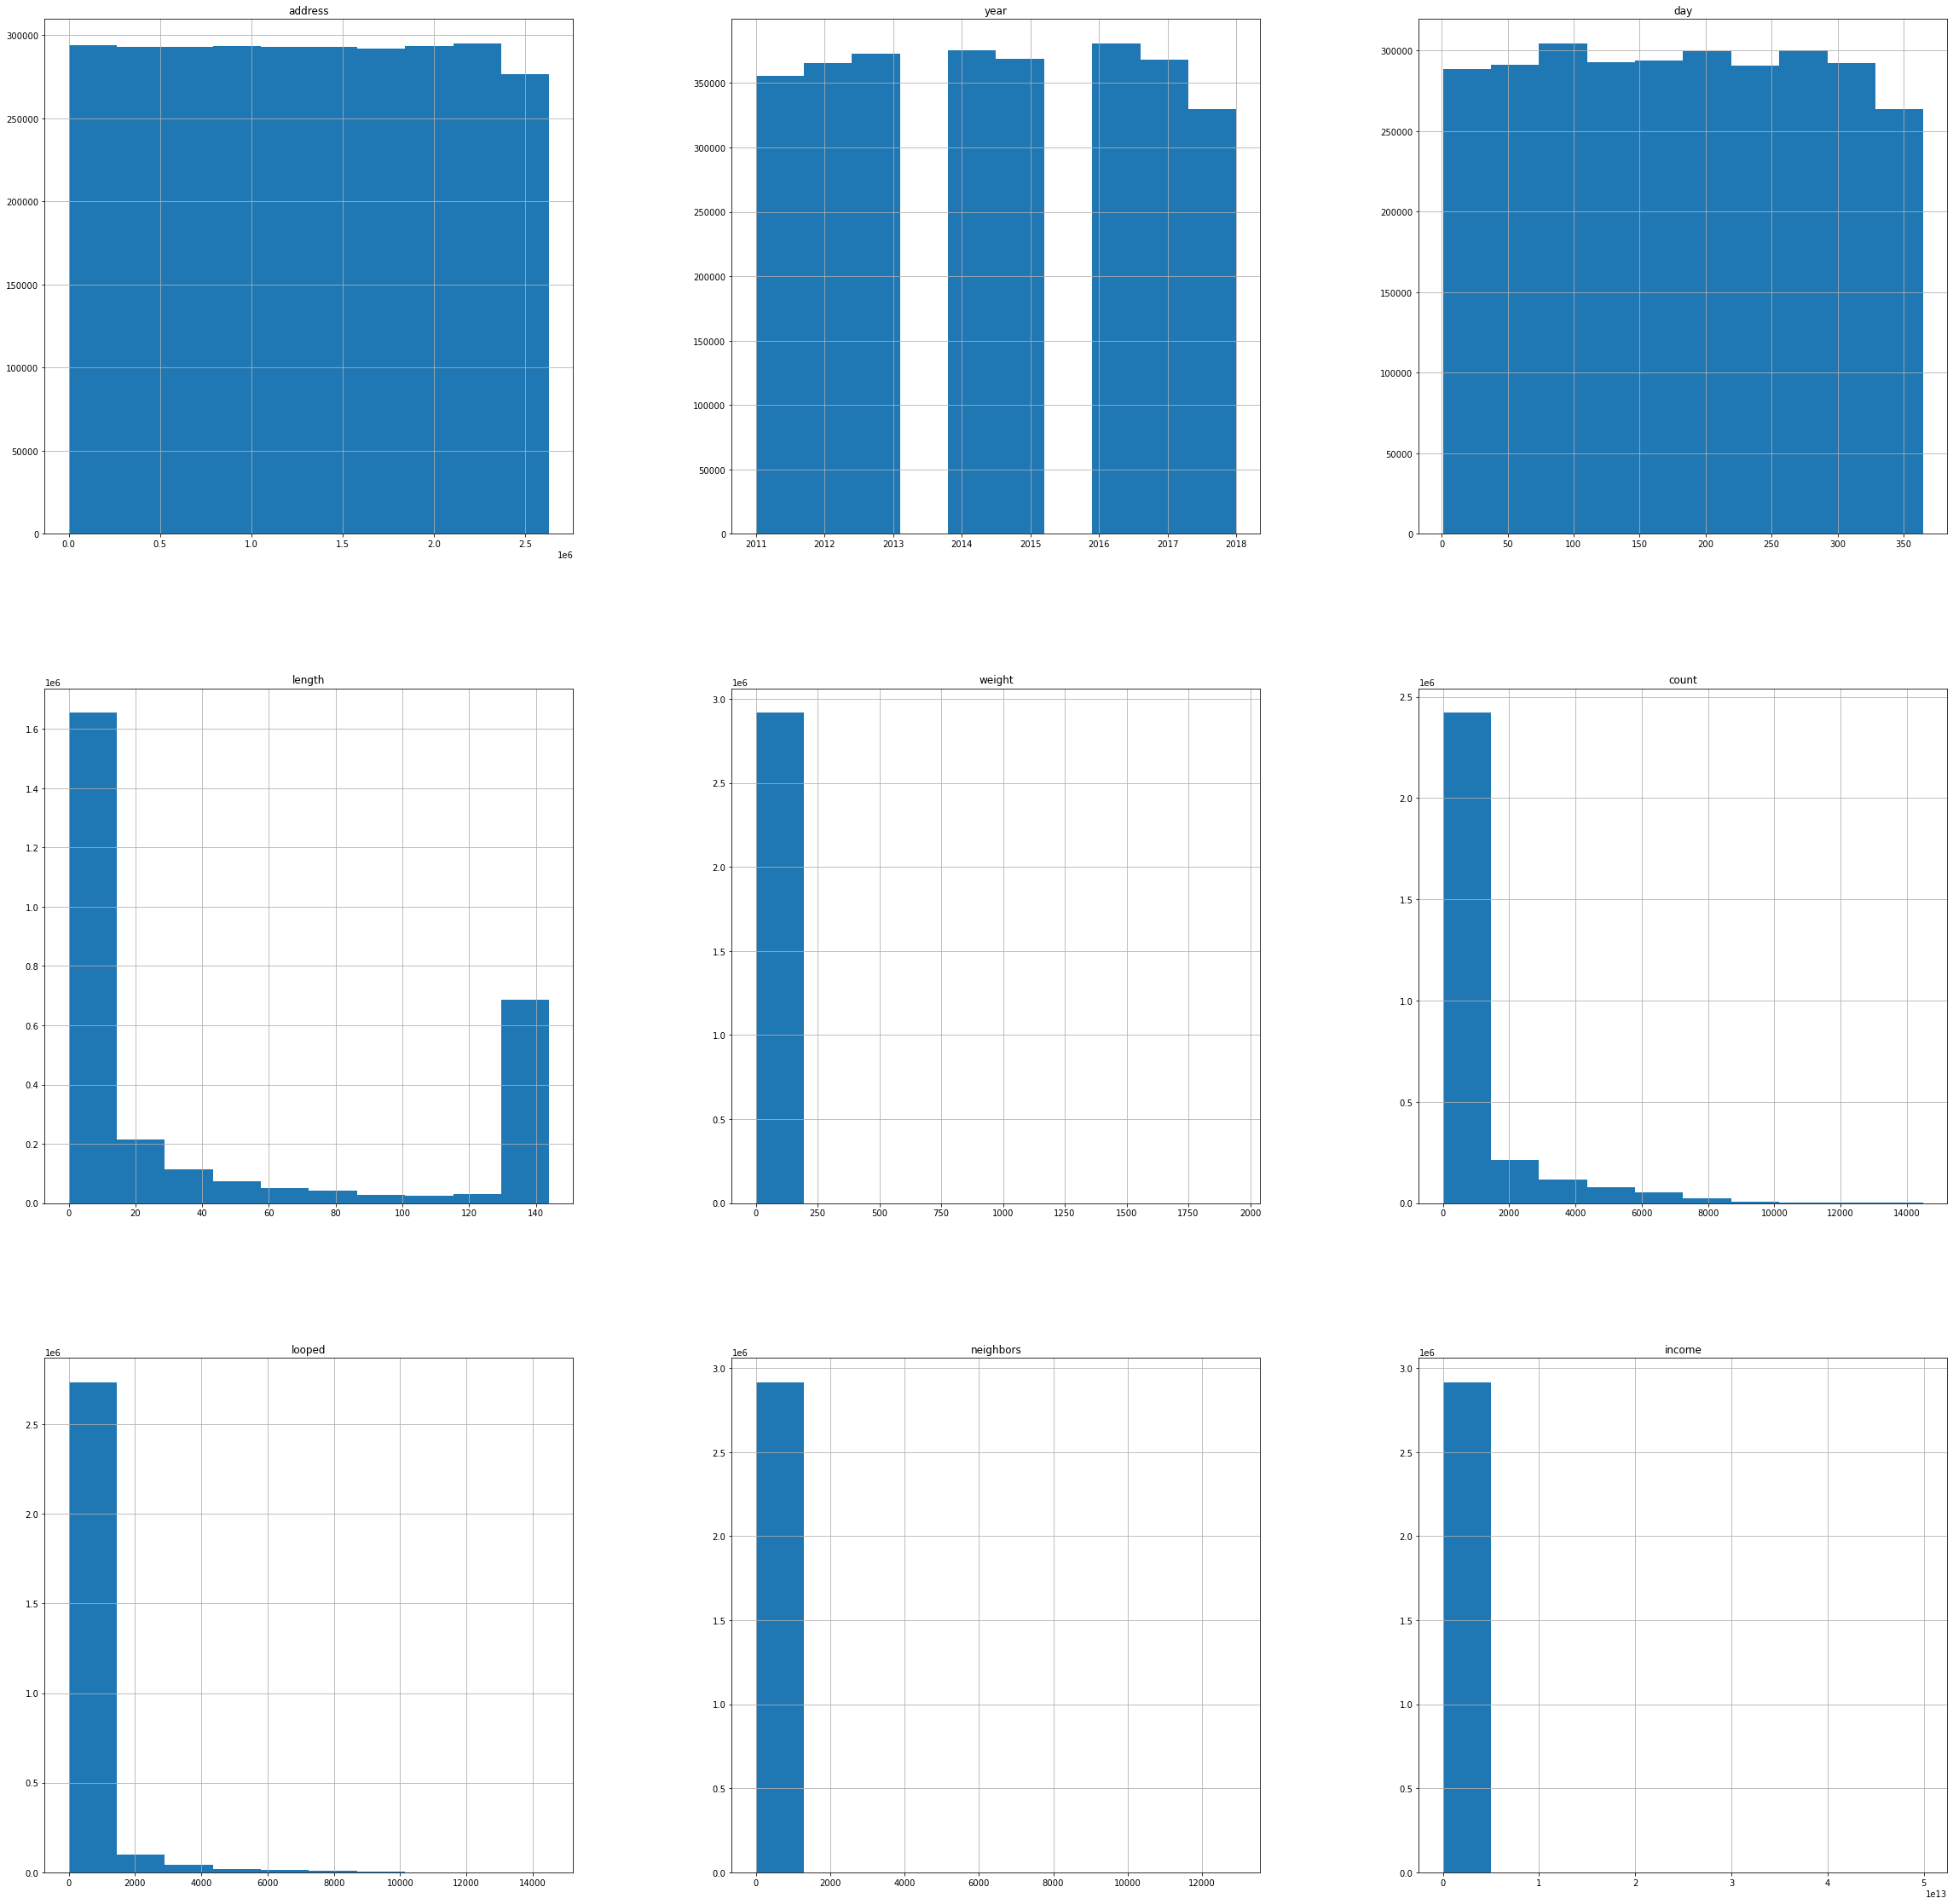

In [14]:
fig = plt.figure(figsize = (40,40))
ax = fig.gca()
bitcoin_data.hist(ax = ax)
plt.show()
# double click the image below to get a zoomed in and much easier to read version

### Insights from the histogram plot:
1. We will need to normalize the data as the scale for each of the feature columns varies insanely
2. As seen previously, there are a lot of White/28s for the labels, meaning that there aren't as many ransomware attacks, so we should expect for our MLP to predict a lot of Whites/28s.
3. It can be safe to assume that very high length is correlated to ransomeware.
4. Moving forward, I think it would be wise to remove the address column as it might not be fully useful.

### PCA part

In [70]:
# first we'll need to normalize the dataset
from sklearn import preprocessing
#normalize everything except for the label class
normal = bitcoin_data.drop('label', axis = 1)
normalized_bitcoin_data = preprocessing.normalize(normal)
normalized_bitcoin_data

array([[2.29885057e-07, 2.01599200e-05, 1.09945027e-07, ...,
        0.00000000e+00, 1.99900050e-08, 1.00000000e+00],
       [1.28000000e-06, 2.01600000e-05, 1.32000000e-06, ...,
        0.00000000e+00, 1.00000000e-08, 1.00000000e+00],
       [8.45000000e-07, 1.00800000e-05, 1.23000000e-06, ...,
        0.00000000e+00, 1.00000000e-08, 1.00000000e+00],
       ...,
       [7.60661450e-04, 8.41440580e-07, 1.37599302e-07, ...,
        2.50180549e-09, 1.45938654e-08, 9.99999711e-01],
       [2.18648748e-03, 1.13343345e-05, 1.85348384e-06, ...,
        0.00000000e+00, 5.61661769e-09, 9.99997610e-01],
       [2.29655924e-02, 1.79569894e-05, 2.93647498e-06, ...,
        0.00000000e+00, 1.77968181e-08, 9.99736254e-01]])

In [16]:
# Check and see the value of all 9 principal components
from sklearn.decomposition import PCA
pca = PCA(n_components = 9)
pca.fit(normalized_bitcoin_data)
bitcoin_data_pca = pca.transform(normalized_bitcoin_data)
variance = np.var(bitcoin_data_pca, axis = 0)
variance_ratio = variance/np.sum(variance)
print("Variance_ratio:",variance_ratio)
print("Pca.Components:",pca.components_)
print("Explained Varaince:",pca.explained_variance_)

Variance_ratio: [9.99880094e-01 1.16871385e-04 2.22105039e-06 4.59542016e-07
 3.46351107e-07 6.74335518e-09 1.14421455e-09 1.72718532e-13
 1.15213476e-13]
Pca.Components: [[ 9.99637063e-01  9.18808261e-04  8.50333286e-05  1.98166003e-05
   1.99296772e-07  3.95634191e-04  8.00075591e-05  7.30017578e-07
  -2.69207792e-02]
 [-2.68933742e-02 -2.03384509e-02 -1.71348112e-03 -5.66091110e-04
  -3.15742233e-06 -5.54364042e-03 -3.01059338e-03 -1.72275597e-05
  -9.99409847e-01]
 [-7.14774864e-04  1.01049275e-01  7.97590253e-03  2.50990924e-02
  -3.15664389e-05  9.61625574e-01  2.53583444e-01  1.03674635e-04
  -8.16300009e-03]
 [-1.40661230e-03  9.90342660e-01  9.10617467e-02  1.16730188e-02
   2.26630269e-04 -1.00009255e-01 -2.00440005e-02  7.81047089e-04
  -1.96637067e-02]
 [-8.14972070e-06 -6.23934298e-03  1.32945453e-03 -1.83719211e-03
   3.53329456e-06 -2.54343599e-01  9.67090154e-01  4.33981613e-05
  -1.37645907e-03]
 [ 2.72448394e-06 -9.14699821e-02  9.95797709e-01  3.88640299e-03
  -1.964

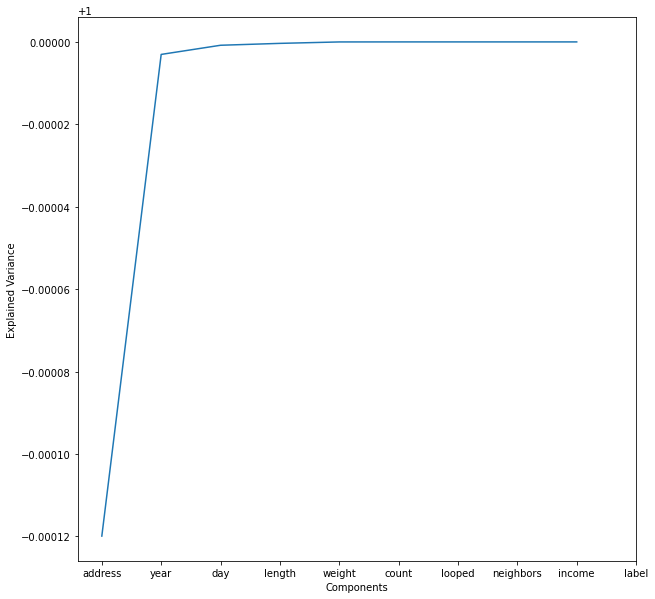

In [17]:
plt.figure(figsize = (10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Components')
plt.ylabel('Explained Variance')
plt.xticks(range(bitcoin_data.shape[1]), bitcoin_data.columns)
plt.show()

In [18]:
# An easier way to see the importance of each componen
np.cumsum(pca.explained_variance_ratio_)

array([0.99988009, 0.99999697, 0.99999919, 0.99999965, 0.99999999,
       1.        , 1.        , 1.        , 1.        ])

The following plot shows us which features from our data set help to explain the most for our data. As we can see the most important ones that explain >90% of the data are address, year, day, and length and we can use these 4 for our MLP if we choose to get rid of any other features.

I used this as a reference to further understand what's going on. https://medium.com/data-science-365/principal-component-analysis-pca-with-scikit-learn-1e84a0c731b0

Check it out as it will help you guys too.

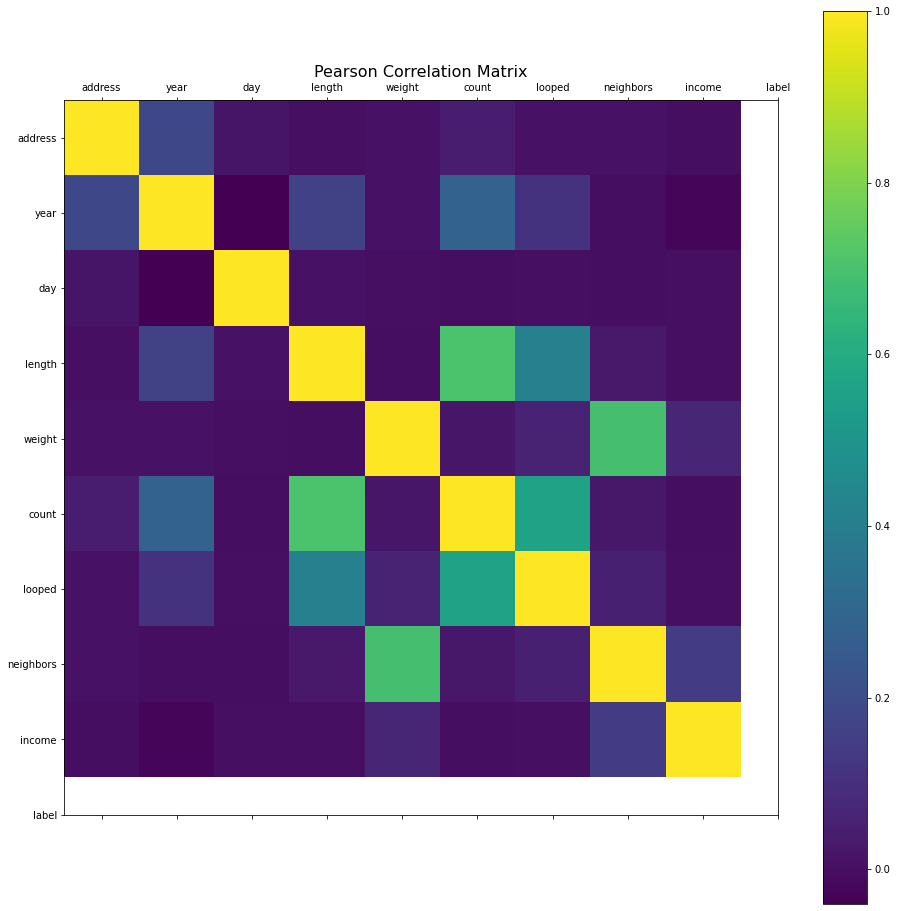

In [19]:
corr_matrix = bitcoin_data.corr()
# plot of the pearson corr matrix as well so that we can also understand how the data correlates with labels
f = plt.figure(figsize=(16, 16))
plt.matshow(corr_matrix, fignum=f.number)
plt.xticks(range(bitcoin_data.shape[1]), bitcoin_data.columns)
plt.yticks(range(bitcoin_data.shape[1]), bitcoin_data.columns)
cb = plt.colorbar()
plt.title('Pearson Correlation Matrix', fontsize=16);
plt.show()

Seems very odd that none of the data points are correlated with label but yet there is high correlation between themselves. 

In [20]:
corr_matrix

,address,year,day,length,weight,count,looped,neighbors,income
address,1.000000,0.185803,0.017566,0.000723,0.009506,0.044201,0.008970,0.008869,-0.001169
year,0.185803,1.000000,-0.040307,0.163101,0.011827,0.285415,0.113164,-0.000876,-0.020535
day,0.017566,-0.040307,1.000000,0.011919,0.000864,-0.002538,0.002566,0.000181,0.002628
length,0.000723,0.163101,0.011919,1.000000,0.000228,0.703467,0.411609,0.031523,0.000488
weight,0.009506,0.011827,0.000864,0.000228,1.000000,0.022313,0.061646,0.691963,0.069774
count,0.044201,0.285415,-0.002538,0.703467,0.022313,1.000000,0.560370,0.025441,-0.003635
looped,0.008970,0.113164,0.002566,0.411609,0.061646,0.560370,1.000000,0.052826,0.002551
neighbors,0.008869,-0.000876,0.000181,0.031523,0.691963,0.025441,0.052826,1.000000,0.138966
income,-0.001169,-0.020535,0.002628,0.000488,0.069774,-0.003635,0.002551,0.138966,1.000000


Here I've plotted an easier to read corr_matrix to see the values and it's evident that there's barely any correlation between the label and the rest of the features. 

In [71]:
# convert normalized data from np.ndarray to pd.dataframe
columns = bitcoin_data.drop('label', axis = 1).columns
normalized_bitcoin_df = pd.DataFrame(normalized_bitcoin_data, columns = columns)
normalized_bitcoin_df

,address,year,day,length,weight,count,looped,neighbors,income
0,2.298851e-07,2.015992e-05,1.099450e-07,1.799100e-07,8.329169e-11,9.995002e-09,0.000000e+00,1.999000e-08,1.000000
1,1.280000e-06,2.016000e-05,1.320000e-06,4.400000e-07,2.441406e-12,1.000000e-08,0.000000e+00,1.000000e-08,1.000000
2,8.450000e-07,1.008000e-05,1.230000e-06,0.000000e+00,5.000000e-09,5.000000e-09,0.000000e+00,1.000000e-08,1.000000
3,3.047753e-06,2.831461e-05,4.522472e-06,1.011236e-06,5.486306e-11,1.404494e-08,0.000000e+00,2.808989e-08,1.000000
4,1.465000e-06,1.008000e-05,1.190000e-06,7.200000e-07,3.642420e-10,2.280000e-06,0.000000e+00,5.000000e-09,1.000000
...,...,...,...,...,...,...,...,...,...
2916692,2.456503e-05,1.606932e-06,2.627787e-07,0.000000e+00,8.847768e-11,7.962992e-10,0.000000e+00,7.962992e-10,1.000000
2916693,4.966028e-02,4.570630e-05,7.474270e-06,0.000000e+00,2.264930e-08,2.264930e-08,0.000000e+00,2.264930e-08,0.998766
2916694,7.606615e-04,8.414406e-07,1.375993e-07,8.339352e-10,5.003611e-09,2.501805e-09,2.501805e-09,1.459387e-08,1.000000
2916695,2.186487e-03,1.133433e-05,1.853484e-06,0.000000e+00,2.808309e-09,5.616618e-09,0.000000e+00,5.616618e-09,0.999998


In [72]:
# Now here is where we'll combine our previous One Hot Encoded labels with our normalized dataset
normalized_bitcoin_df = normalized_bitcoin_df.join(enc_df)
normalized_bitcoin_df

,address,year,day,length,weight,count,looped,neighbors,income,0,...,19,20,21,22,23,24,25,26,27,28
0,2.298851e-07,2.015992e-05,1.099450e-07,1.799100e-07,8.329169e-11,9.995002e-09,0.000000e+00,1.999000e-08,1.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.280000e-06,2.016000e-05,1.320000e-06,4.400000e-07,2.441406e-12,1.000000e-08,0.000000e+00,1.000000e-08,1.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,8.450000e-07,1.008000e-05,1.230000e-06,0.000000e+00,5.000000e-09,5.000000e-09,0.000000e+00,1.000000e-08,1.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,3.047753e-06,2.831461e-05,4.522472e-06,1.011236e-06,5.486306e-11,1.404494e-08,0.000000e+00,2.808989e-08,1.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.465000e-06,1.008000e-05,1.190000e-06,7.200000e-07,3.642420e-10,2.280000e-06,0.000000e+00,5.000000e-09,1.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2916692,2.456503e-05,1.606932e-06,2.627787e-07,0.000000e+00,8.847768e-11,7.962992e-10,0.000000e+00,7.962992e-10,1.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2916693,4.966028e-02,4.570630e-05,7.474270e-06,0.000000e+00,2.264930e-08,2.264930e-08,0.000000e+00,2.264930e-08,0.998766,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2916694,7.606615e-04,8.414406e-07,1.375993e-07,8.339352e-10,5.003611e-09,2.501805e-09,2.501805e-09,1.459387e-08,1.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2916695,2.186487e-03,1.133433e-05,1.853484e-06,0.000000e+00,2.808309e-09,5.616618e-09,0.000000e+00,5.616618e-09,0.999998,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [87]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow import keras
from keras import layers, models
from keras.models import Sequential
from keras.layers import Activation, Dense

# start out splitting the data
X = normalized_bitcoin_df.drop(normalized_bitcoin_df.iloc[:, 9:38], axis = 1)
y = normalized_bitcoin_df.iloc[:,9:38]
# we have 29 different classes that we are trying to output and predict
num_classes = 29
# split the data into train, validate, test
# The validation data is selected from the last samples in the x and y data provided, before shuffling
X_train, X_validate, y_train, y_validate = train_test_split(X, y, test_size=.3, random_state = 42)
X_validate, X_test, y_validate, y_test = train_test_split(X_validate, y_validate, test_size=(1/3), random_state = 42)

print("X SHAPE")
print(X.shape)
print("X_train SHAPE")
print(X_train.shape, "%: ", X_train.shape[0]/X.shape[0])
print("X_validate SHAPE")
print(X_validate.shape,  "%: ", X_validate.shape[0]/X.shape[0])
print("X_test SHAPE")
print(X_test.shape,  "%: ", X_test.shape[0]/X.shape[0])


print("y SHAPE")
print(y.shape)
print("y_train SHAPE")
print(y_train.shape, "%: ", y_train.shape[0]/y.shape[0])
print("y_validate SHAPE")
print(y_validate.shape,"%: ", y_validate.shape[0]/y.shape[0])
print("y_test SHAPE")
print(y_test.shape, "%: ", y_test.shape[0]/y.shape[0])

X SHAPE
(2916697, 9)
X_train SHAPE
(2041687, 9) %:  0.6999996914317805
X_validate SHAPE
(583340, 9) %:  0.2000002057121463
X_test SHAPE
(291670, 9) %:  0.10000010285607315
y SHAPE
(2916697, 29)
y_train SHAPE
(2041687, 29) %:  0.6999996914317805
y_validate SHAPE
(583340, 29) %:  0.2000002057121463
y_test SHAPE
(291670, 29) %:  0.10000010285607315


In [24]:
X.head()

,address,year,day,length,weight,count,looped,neighbors,income
0,2.298851e-07,0.000020,1.099450e-07,1.799100e-07,8.329169e-11,9.995002e-09,0.0,1.999000e-08,1.0
1,1.280000e-06,0.000020,1.320000e-06,4.400000e-07,2.441406e-12,1.000000e-08,0.0,1.000000e-08,1.0
2,8.450000e-07,0.000010,1.230000e-06,0.000000e+00,5.000000e-09,5.000000e-09,0.0,1.000000e-08,1.0
3,3.047753e-06,0.000028,4.522472e-06,1.011236e-06,5.486306e-11,1.404494e-08,0.0,2.808989e-08,1.0
4,1.465000e-06,0.000010,1.190000e-06,7.200000e-07,3.642420e-10,2.280000e-06,0.0,5.000000e-09,1.0


In [89]:
y.head()

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [95]:
# Create a multilayer sequential model with Dropout and use of SGD w/ Nesterov
model = Sequential()
layer_1 = Dense(64, activation='relu', kernel_initializer='glorot_normal', bias_initializer='zeros', input_shape=(9,))
model.add(layer_1)
model.add(layers.BatchNormalization())
layer_2 = Dense(32, activation='relu', kernel_initializer='glorot_normal', bias_initializer='zeros')
model.add(layer_2)
model.add(layers.BatchNormalization())
layer_3 = Dense(32, activation='relu', kernel_initializer='glorot_normal', bias_initializer='zeros')
model.add(layer_3)
model.add(layers.BatchNormalization())
layer_4 = Dense(32, activation='relu', kernel_initializer='glorot_normal', bias_initializer='zeros')
model.add(layer_4)
model.add(layers.Dropout(0.4))
model.add(layers.Dense(num_classes, activation='softmax'))

#compile model and set loss function, optimizer, and metrics
sgd = keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [27]:
#A quick summary of the model
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                640       
_________________________________________________________________
batch_normalization_1 (Batch (None, 64)                256       
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
batch_normalization_2 (Batch (None, 32)                128       
_________________________________________________________________
dense_3 (Dense)              (None, 32)                1056      
_________________________________________________________________
batch_normalization_3 (Batch (None, 32)                128       
_________________________________________________________________
dense_4 (Dense)              (None, 32)               

In [28]:
# train model, and validate after each epoch
historyGradientDescent = model.fit(X_train, y_train, batch_size=128, epochs=10,
                                   verbose=1, validation_data=(X_validate, y_validate))

Train on 2041687 samples, validate on 583340 samples
Epoch 1/10
2041687/2041687 [==============================] - 41s 20us/step - loss: 0.1333 - accuracy: 0.9849 - val_loss: 0.0975 - val_accuracy: 0.9861
Epoch 2/10
2041687/2041687 [==============================] - 42s 21us/step - loss: 0.1072 - accuracy: 0.9857 - val_loss: 0.0954 - val_accuracy: 0.9861
Epoch 3/10
2041687/2041687 [==============================] - 44s 21us/step - loss: 0.1037 - accuracy: 0.9857 - val_loss: 0.0950 - val_accuracy: 0.9861
Epoch 4/10
2041687/2041687 [==============================] - 42s 21us/step - loss: 0.1019 - accuracy: 0.9857 - val_loss: 0.0949 - val_accuracy: 0.9861
Epoch 5/10
2041687/2041687 [==============================] - 41s 20us/step - loss: 0.1006 - accuracy: 0.9857 - val_loss: 0.0947 - val_accuracy: 0.9861
Epoch 6/10
2041687/2041687 [==============================] - 41s 20us/step - loss: 0.1000 - accuracy: 0.9857 - val_loss: 0.0946 - val_accuracy: 0.9861
Epoch 7/10
2041687/2041687 [=======

Text(0.5, 1.0, 'Loss Curves SGD w/ Nesterov Momentum')

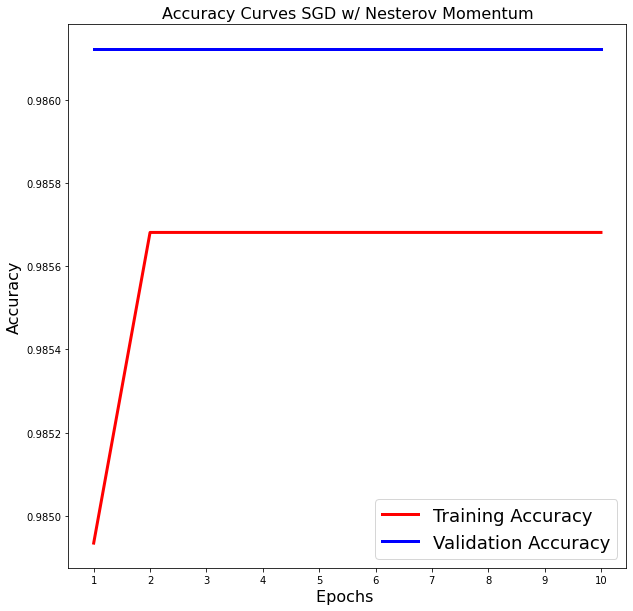

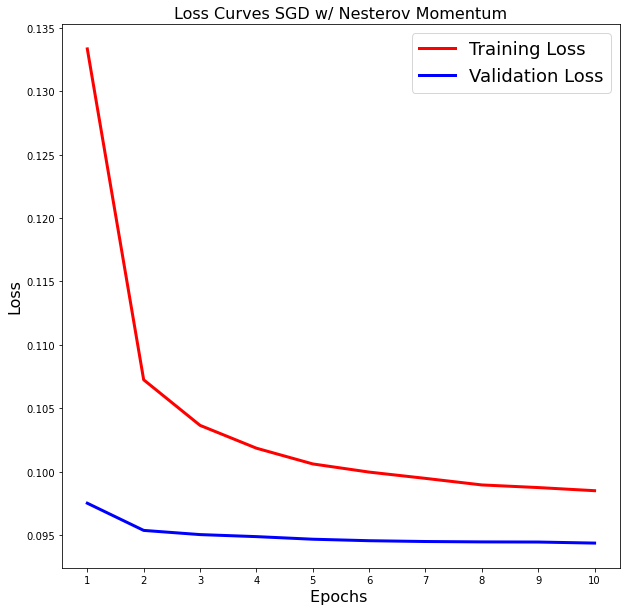

In [29]:
#Plot the Accuracy and Loss Curves of SGD w/ Nesterov Momentum
plt.figure(figsize=[10,10])
plt.plot(historyGradientDescent.history['accuracy'], 'r', linewidth=3.0)
plt.plot(historyGradientDescent.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.xticks([i for i in range(0,10)],[i for i in range(1,11)])
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves SGD w/ Nesterov Momentum',fontsize=16)
#Plot the Loss Curves
plt.figure(figsize=[10,10])
plt.plot(historyGradientDescent.history['loss'], 'r', linewidth=3.0)
plt.plot(historyGradientDescent.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training Loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.xticks([i for i in range(0,10)],[i for i in range(1,11)])
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves SGD w/ Nesterov Momentum',fontsize=16)

### Plotting the Confusion Matrix

In [153]:
# Make predictions of X_test
y_test_pred = model.predict(X_test)

In [154]:
# Convert our pred array from a multicolumn array of probable predictions to a single column that 
# only has 1 prediction value which is the largest probability. So if for row 0 out of the 29 (index starts at 0)
# columns we have, if column 29 in row 0 has the highest value in it, then our Neural Net predicted the sample in 
# row 0 as being most likely the label that falls under 28.
y_test_pred = np.argmax(y_test_pred, axis = 1)

In [155]:
# There is a method to my madness, basically since random_state is 42, the data will be shuffled the same way. 
# We also need a single column array to be placed in the confusion matrix for y_true. Our previous y_test was the 
# one hot encoded y, which gave out a 29 column matrix. It was too much work to try and reverse that so instead I just
# took bitcoin_data.label which is already label encoded and split it among these new training, validation, and test
# sets since they're all going to be split the same way
y2 = bitcoin_data.label
X_train2, X_validate2, y_train2, y_validate2 = train_test_split(X, y2, test_size=.3, random_state = 42)
X_validate2, X_test2, y_validate2, y_test2 = train_test_split(X_validate2, y_validate2, test_size=(1/3), random_state = 42)

In [156]:
y_test.columns

Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28],
      dtype='object')

In [157]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(
    y_test2,
    y_test_pred,
    labels=y_test.columns)
print(cm)

[[     0      0      0      0      0      0      0      0      0      0
       0      0      0      0      0      0      0      0      0      0
       0      0      0      0      0      0      0      0      0]
 [     0      0      0      0      0      0      0      0      0      0
       0      0      0      0      0      0      0      0      0      0
       0      0      0      0      0      0      0      0      0]
 [     0      0      0      0      0      0      0      0      0      0
       0      0      0      0      0      0      0      2      0      0
       0      0      0      0      0      0      0      0      0]
 [     0      0      0      0      0      0      0      0      0      0
       0      0      0      0      0      0      0    225      0      0
       0      0      0      0      0      0      0      0      0]
 [     0      0      0      0      0      0      0      0      0      0
       0      0      0      0      0      0      0    942      0      0
       0      0 

In [158]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(30, 30))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

C:\Users\Aaron\anaconda3\envs\DeepLearning\lib\site-packages\ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in true_divide


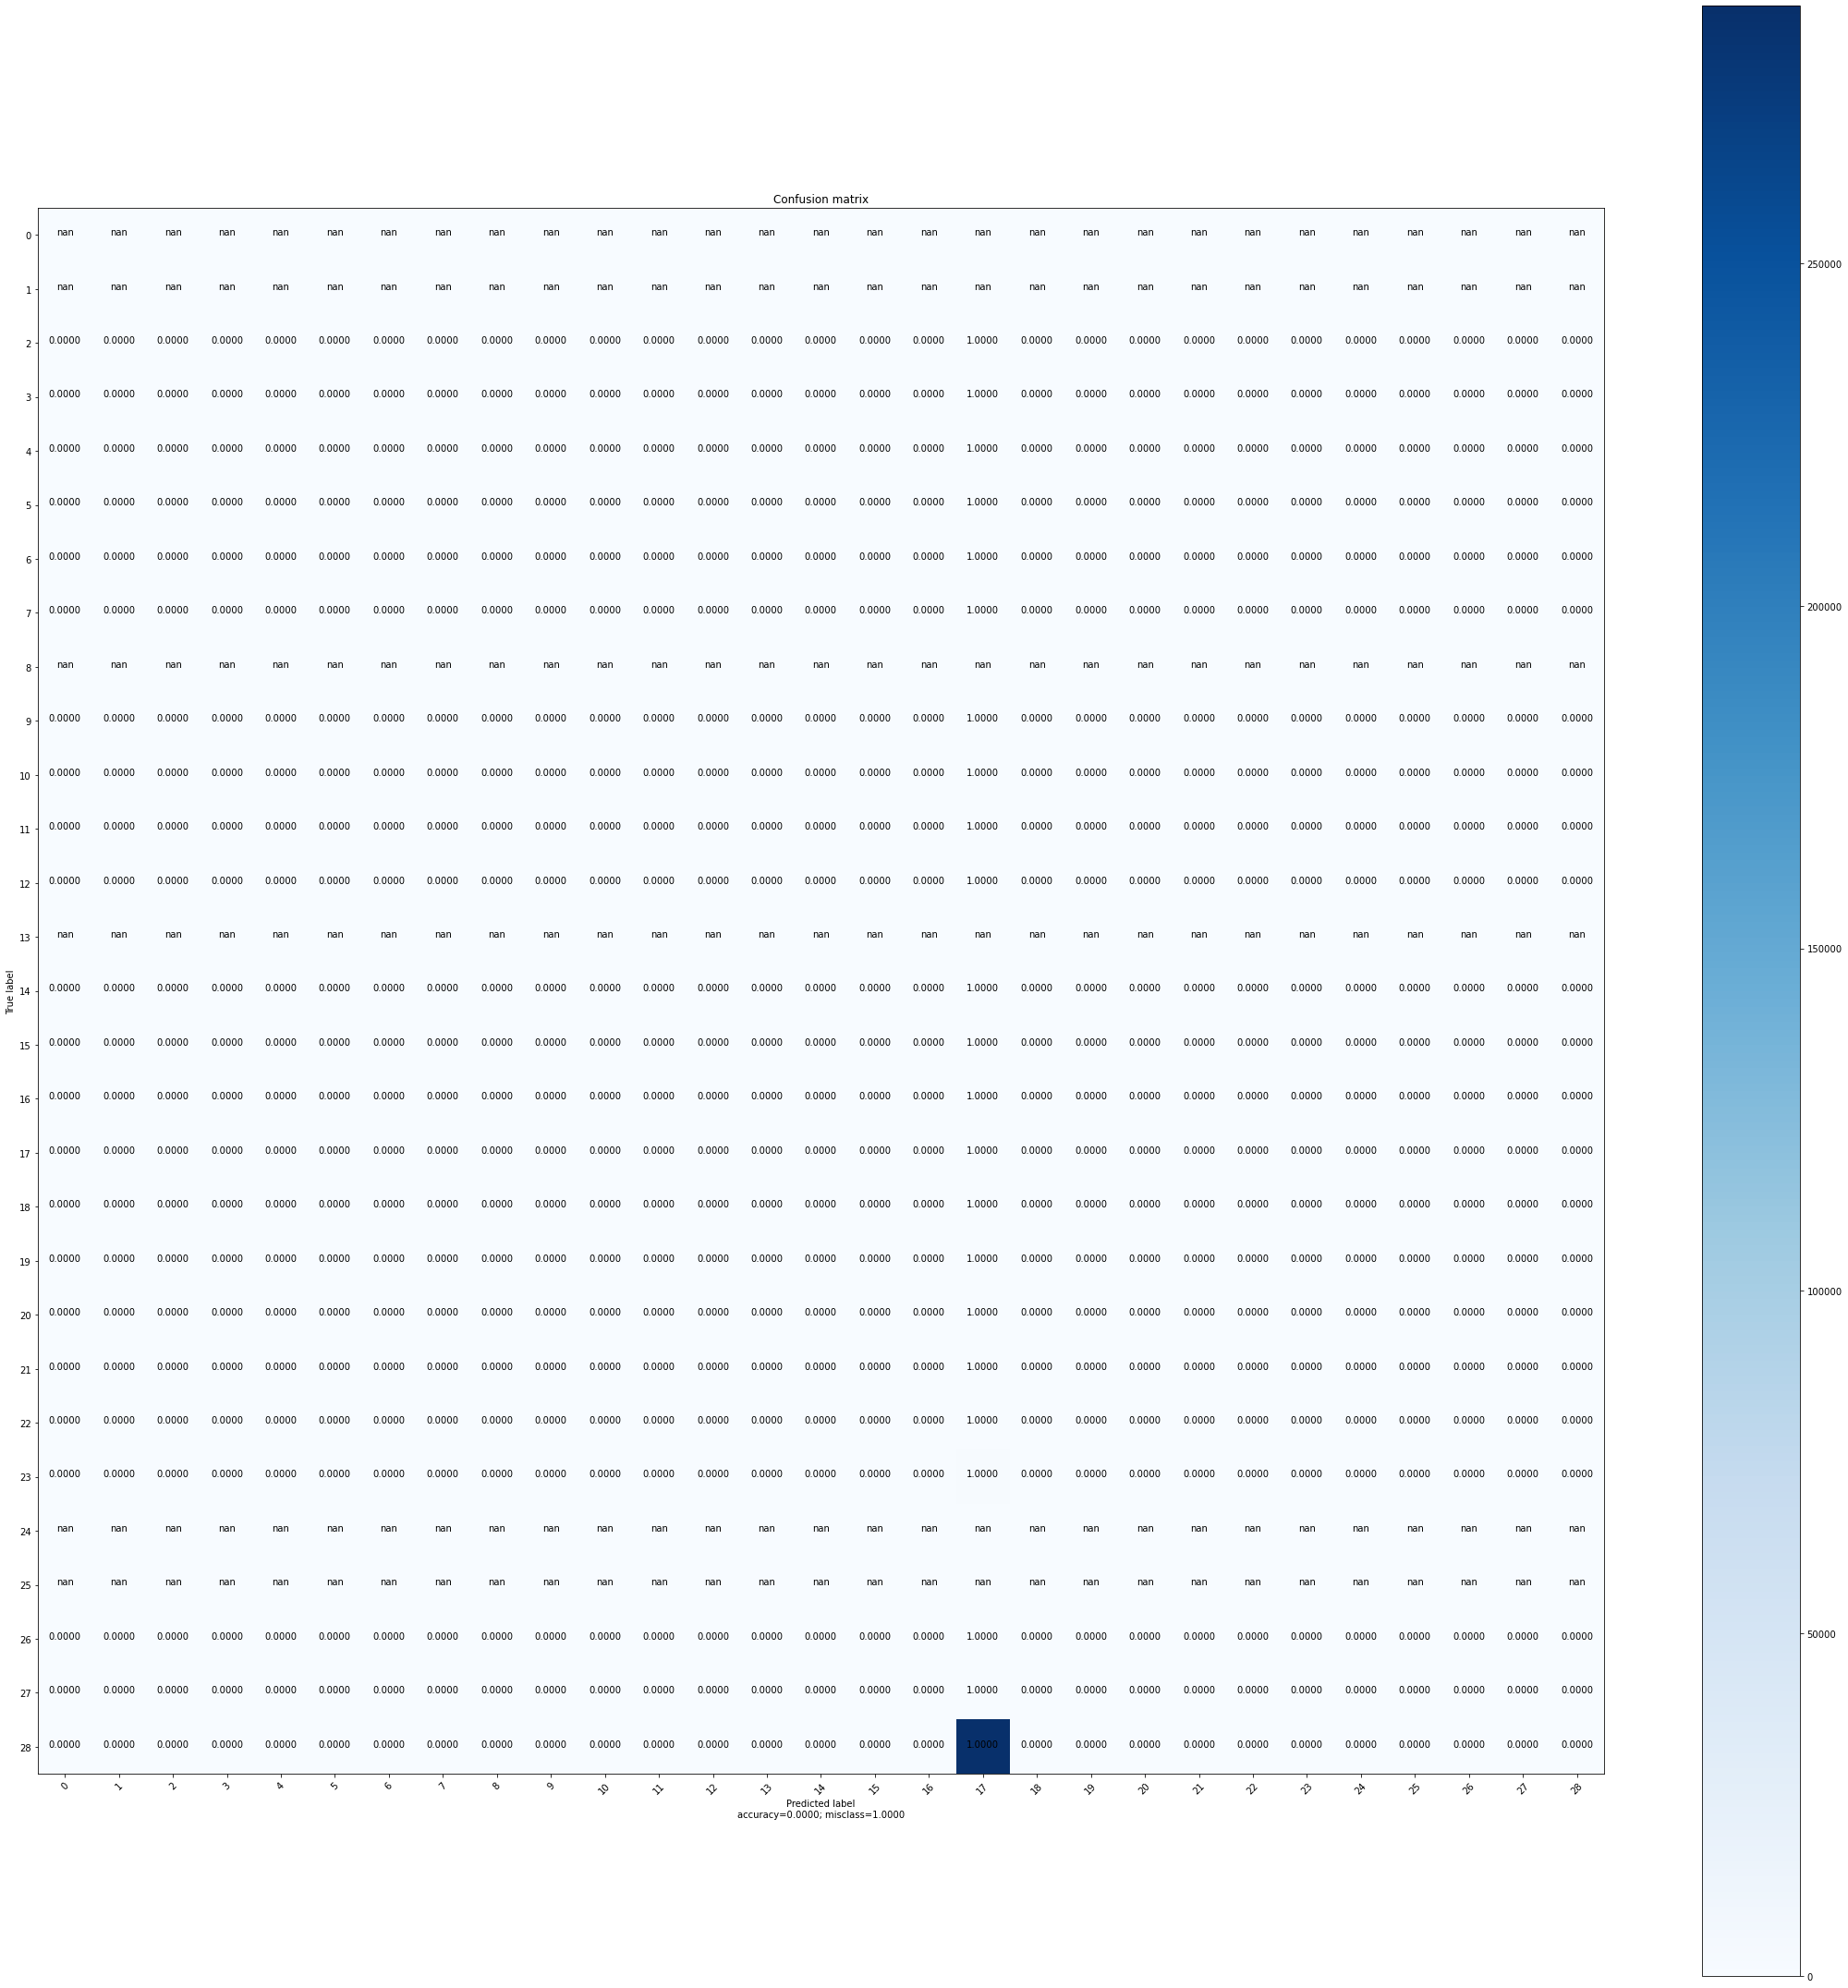

In [160]:
plot_confusion_matrix(cm, y_test.columns, title='Confusion matrix', cmap=None, normalize=True)

### Plotting the ROC/AUC curves

In [ ]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(pred, y_unique)